In [1]:
input_file='/Users/pranjalideshmukh/Downloads/train.csv'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv(input_file)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing values

<AxesSubplot:>

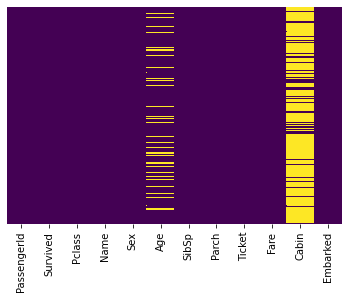

In [9]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Most of the null values are present in age and cabin column. Age values roughly has 20% of its data missing 

<AxesSubplot:xlabel='Survived', ylabel='count'>

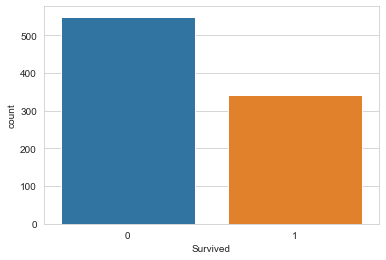

In [10]:
#visualizing count of people who survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

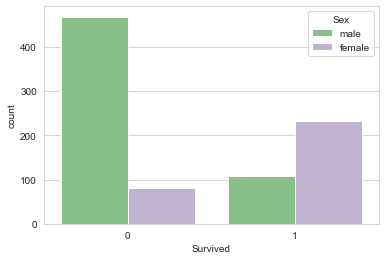

In [14]:
#understanding the count of people who survived based on their sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

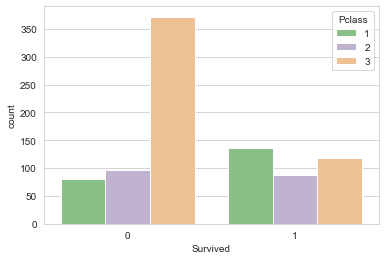

In [16]:
#understanding the count of people who survived based on pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='Accent')

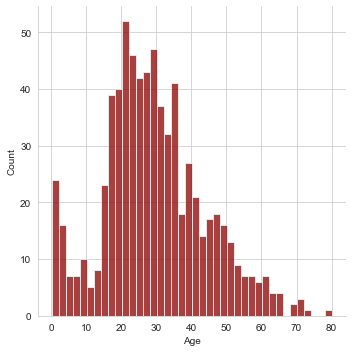

In [22]:
sns.displot(train['Age'].dropna(),kde=False,bins=40,color='darkred')

It almost forms a bell curve with some outliers, we can observe that most values lie between 20-30 years of age

<AxesSubplot:xlabel='SibSp', ylabel='count'>

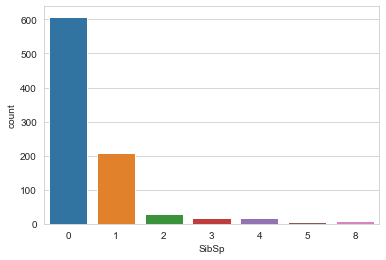

In [23]:
#checking if passanger had any siblings or spouse on board
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

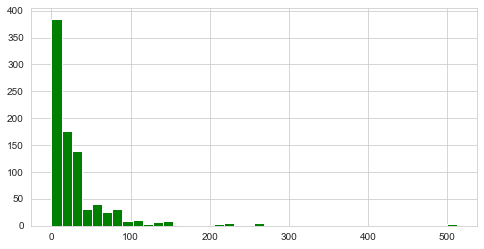

In [24]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning 

Checking the average age depending on passenger class using boxplots

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

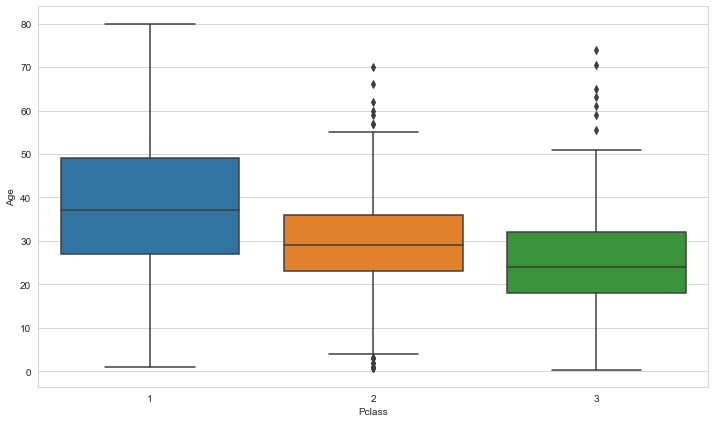

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

We can observe different age average values for different pclass

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [29]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

Checking again

<AxesSubplot:>

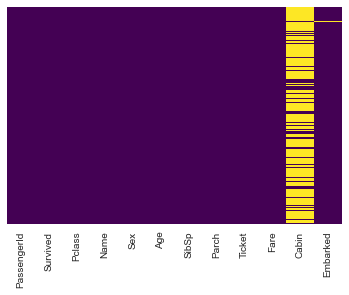

In [30]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [31]:
train.drop('Cabin',inplace=True,axis=1)

## Categorical Encoding
get_dummies is like one hot encoding 

In [35]:
sex=pd.get_dummies(train['Sex'],drop_first=True) #dropping female column, as there are only 2 columns
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
#dropping columns
train.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)

In [37]:
train=pd.concat([train,sex,embark],axis=1)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],
                                               test_size=0.30,random_state=101)


## Training and Prediction

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model=LogisticRegression()
model.fit(X_train,y_train)

/Users/pranjalideshmukh/Downloads/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions=model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
accuracy

0.7686567164179104

In [47]:
from sklearn.metrics import confusion_matrix

accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[134,  20],
       [ 42,  72]])

## Preprocessing modeling Test dataset

In [48]:
input='/Users/pranjalideshmukh/Downloads/test.csv'

In [49]:
test=pd.read_csv(input)

In [51]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Name','Ticket','Sex','Embarked','Cabin'],inplace=True,axis=1)

In [55]:
test=pd.concat([test,sex,embark],axis=1)

<AxesSubplot:>

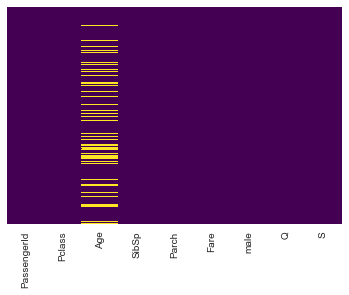

In [62]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

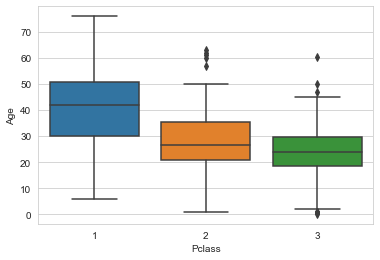

In [63]:
sns.boxplot(x='Pclass',y='Age',data=test)

In [66]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
test['Age']=test[['Age','Pclass']].apply(impute_age_test,axis=1)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [73]:
test.dropna(inplace=True)

In [75]:
predictions_1=model.predict(test)

In [77]:
predictions_1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,